In [35]:
from helpers import *
from sklearn.decomposition import PCA
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

MAIN_DIR = '/Users/tomas/Documents/MOOCS/udacity/mlnd/p5'

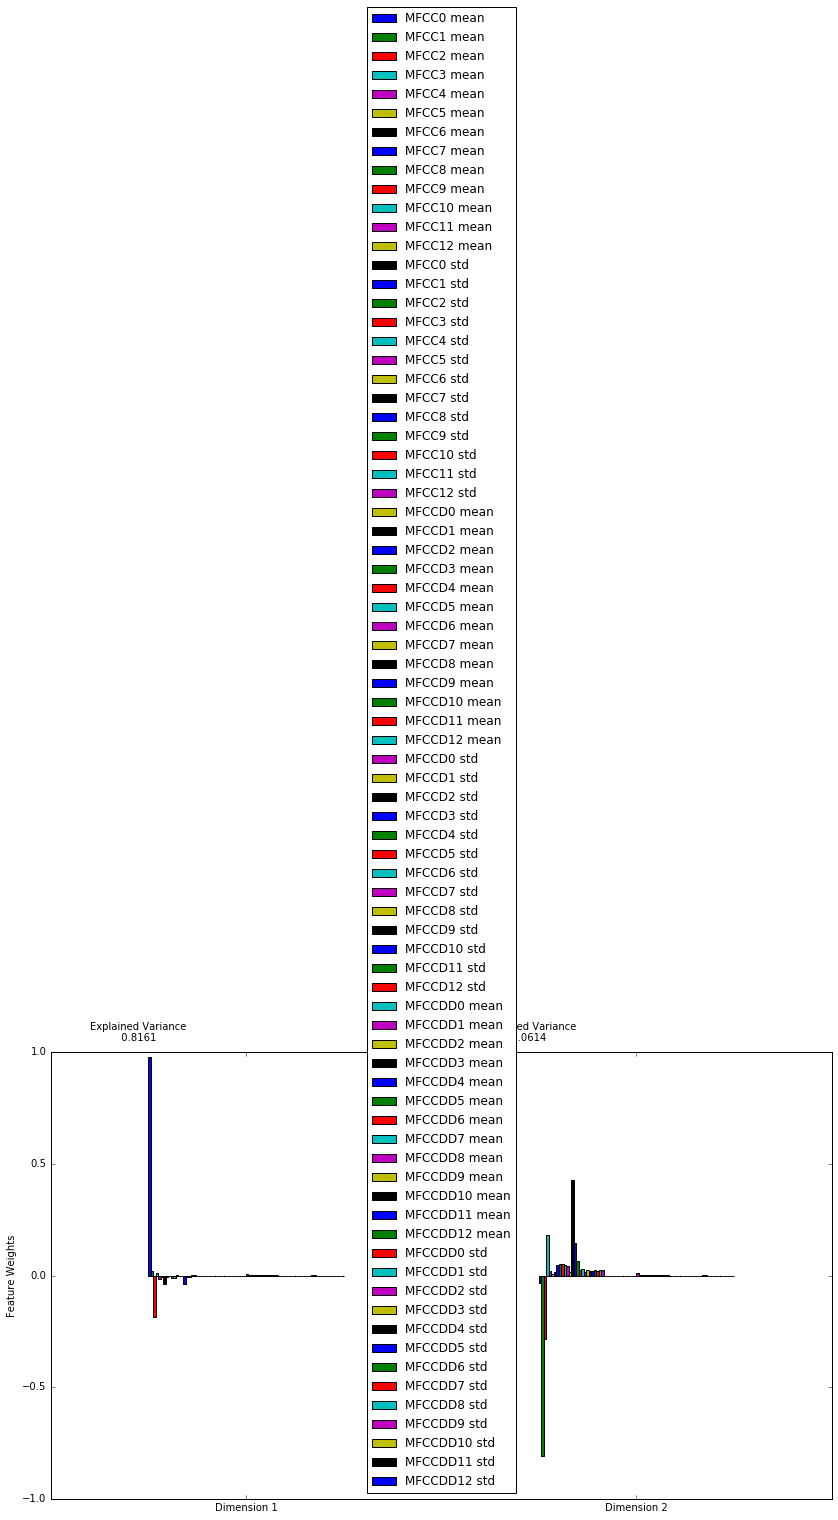

In [68]:
df = pd.read_pickle(MAIN_DIR+'/dataframe2.pkl')
df['genre'] = df['genre'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

new_df = df.drop(['genre', 'ZCR mean', 'ZCR std', 'RMS mean', 'RMS std', 'SC mean', 'SC std'], axis = 1)

pca = PCA(n_components=2).fit(new_df)

pca_results = rs.pca_results(new_df, pca)

In [69]:
display(new_df.describe())

,MFCC0 mean,MFCC1 mean,MFCC2 mean,MFCC3 mean,MFCC4 mean,MFCC5 mean,MFCC6 mean,MFCC7 mean,MFCC8 mean,MFCC9 mean,...,MFCCDD3 std,MFCCDD4 std,MFCCDD5 std,MFCCDD6 std,MFCCDD7 std,MFCCDD8 std,MFCCDD9 std,MFCCDD10 std,MFCCDD11 std,MFCCDD12 std
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,538.449001,176.308528,3.940937,3.233895,6.581990,0.283611,-8.547627,-4.776930,-3.593886,-6.193268,...,0.329400,0.307278,0.276597,0.262482,0.252835,0.251734,0.251565,0.249202,0.247922,0.250343
std,102.207105,26.394703,28.900565,12.649378,11.112400,7.860083,8.347177,6.803873,8.081938,6.776326,...,0.078411,0.076379,0.054914,0.045168,0.039796,0.042861,0.044376,0.042197,0.044113,0.053523
min,229.644520,66.334141,-82.570087,-26.419118,-28.611688,-31.660522,-32.108955,-27.266033,-32.352156,-25.112708,...,0.167232,0.136637,0.141596,0.136757,0.122557,0.121751,0.119476,0.122671,0.127525,0.117338
25%,470.692767,160.895003,-18.318961,-4.295472,-1.530942,-3.971246,-12.936921,-8.683491,-8.219757,-9.970683,...,0.273225,0.253947,0.240534,0.233403,0.230635,0.228000,0.226062,0.225656,0.223268,0.223201
50%,547.027851,179.256275,-0.047138,3.657685,6.709570,0.537628,-7.983462,-4.894874,-4.009362,-6.114160,...,0.316052,0.297162,0.273828,0.260573,0.252733,0.251313,0.249361,0.248324,0.246056,0.245864
75%,608.385747,195.106173,22.086545,11.406043,14.436723,4.834010,-3.770599,-0.812714,0.491638,-2.231130,...,0.373348,0.346807,0.308202,0.290573,0.276384,0.274606,0.274085,0.271337,0.269658,0.271991
max,830.458662,240.743530,96.469498,33.003742,36.917463,29.447942,16.751028,27.300744,51.405604,34.514347,...,0.630505,0.665388,0.497016,0.472620,0.402031,0.449611,0.470971,0.440231,0.468652,0.767401


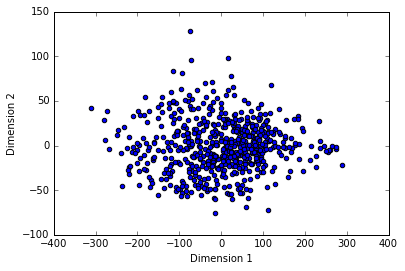

In [70]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(new_df)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(new_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

reduced_data.plot(x='Dimension 1', y='Dimension 2', kind='scatter')

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_clusters = [2,3,4,5,6]
sil_scores = []

for k in k_clusters:
    clusterer = KMeans(n_clusters = k).fit_predict(reduced_data)
    score = silhouette_score(reduced_data, clusterer)
    sil_scores.append((k,score))
    
print sil_scores

[(2, 0.50471367991993632), (3, 0.41528801073909188), (4, 0.41400166282994311), (5, 0.39951545750876344), (6, 0.35980451348069148)]


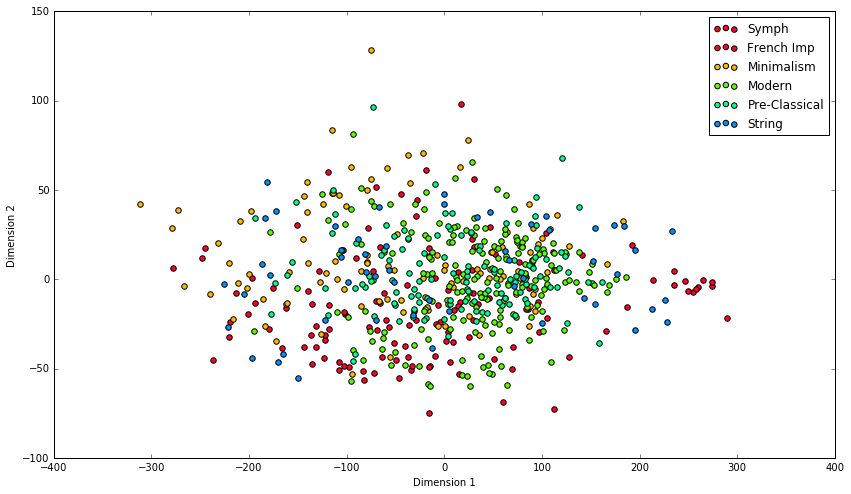

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# TODO: Apply your clustering algorithm of choice to the reduced data
clusterer = KMeans(n_clusters=6, random_state=1).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_ 

# TODO: Predict the cluster for each transformed sample data point
sample_preds = []

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

labels = pd.DataFrame(df, columns = ['genre'])
plot_data = pd.concat([labels, reduced_data], axis = 1)
    
# Generate the cluster plot
fig, ax = plt.subplots(figsize = (14,8))

# Color map
cmap = cm.get_cmap('gist_rainbow')

# Color the points based on assigned Channel
labels = ['French Imp', 'Minimalism', 'Modern', 'Pre-Classical', 'String', 'Symph']
grouped = plot_data.groupby('genre')
for i, channel in grouped:
    channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                 color = cmap((i-1)*1.0/6), label = labels[i-1], s=30);

